In [1]:
import sys
import pandas as pd
import os

# Add the root folder of your project
root_path = os.path.abspath(os.path.join("..", ".."))  # two levels up from experiments
sys.path.append(root_path)

from weather_classification.modeling.mlp import MLPClassifier
from weather_classification.modeling.modern_lenet import LeNetModern
from weather_classification.modeling.cnn import CNN_V1, CNN_V1_reg, CNN_V2, CNN_V2_reg, CNN_V3, CNN_V3_reg,CNN_V3_Improved
from weather_classification.predict import predict
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from weather_classification.train import FlattenTransform
from weather_classification.seed_utils import set_seed
set_seed(1234)


In [5]:
mean = [0.5167, 0.5143, 0.5164]
std = [0.2378, 0.2359, 0.2393]

In [14]:
num_classes = 11
model = MLPClassifier(input_dim=64*64*3, num_classes=num_classes)
model_path = "../../models/best_model_MLPClassifier.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((64, 64)),   # Resize images
    transforms.ToTensor(),         # Convert to tensor
    #transforms.Normalize(mean=mean, std=std),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten para MLP
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_MLPClassifier.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.5395894428152492
✅ Results saved in ../../models/predictions\preds_MLPClassifier.csv
Global Accuracy: 0.5396


In [4]:
num_classes = 11
model = LeNetModern(input_dim=64*64*3, num_classes=num_classes)
model_path = "../../models/best_model_LeNetModern.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_LeNetModern.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7727272727272727
✅ Results saved in ../../models/predictions\preds_LeNetModern.csv
Global Accuracy: 0.7727


In [5]:
num_classes = 11
model = CNN_V1(input_dim=64*64*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V1.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V1.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7551319648093842
✅ Results saved in ../../models/predictions\preds_CNN_V1.csv
Global Accuracy: 0.7551


In [6]:
num_classes = 11
model = CNN_V1_reg(input_dim=64*64*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V1_reg.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V1_reg.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7448680351906158
✅ Results saved in ../../models/predictions\preds_CNN_V1_reg.csv
Global Accuracy: 0.7449


In [7]:
num_classes = 11
model = CNN_V2(input_dim=128*128*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V2.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V2.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7844574780058651
✅ Results saved in ../../models/predictions\preds_CNN_V2.csv
Global Accuracy: 0.7845


In [8]:
num_classes = 11
model = CNN_V2_reg(input_dim=128*128*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V2_reg.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V2_reg.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7595307917888563
✅ Results saved in ../../models/predictions\preds_CNN_V2_reg.csv
Global Accuracy: 0.7595


In [9]:
num_classes = 11
model = CNN_V3(input_dim=224*224*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V3.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V3.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7991202346041055
✅ Results saved in ../../models/predictions\preds_CNN_V3.csv
Global Accuracy: 0.7991


In [10]:
num_classes = 11
model = CNN_V3_reg(input_dim=224*224*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V3_reg.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V3_reg.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7932551319648093
✅ Results saved in ../../models/predictions\preds_CNN_V3_reg.csv
Global Accuracy: 0.7933


In [11]:
num_classes = 11
model = CNN_V3_Improved(input_dim=224*224*3, num_classes=num_classes)
model_path = "../../models/best_model_CNN_V3_Improved.pth"
set_path = "../../data/val"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])
acc, all_labels, all_preds, all_paths = predict(model, model_path, transform, set_path, batch_size=32)
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

df = pd.DataFrame({
    "img_path": all_paths,
    "true_label": all_labels,
    "pred_label": all_preds,
    "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
})

out_path = os.path.join(out_dir, "preds_CNN_V3_Improved.csv")
df.to_csv(out_path, index=False)
print(f"✅ Results saved in {out_path}")
print(f"Global Accuracy: {acc:.4f}")

../../data/val
Detected raw state_dict format
Validation accuracy: 0.7932551319648093
✅ Results saved in ../../models/predictions\preds_CNN_V3_Improved.csv
Global Accuracy: 0.7933


In [3]:
models_dir = "../../models"
val_dir = "../../data/val"
out_dir = "../../models/predictions"
os.makedirs(out_dir, exist_ok=True)

num_classes = 11

# 🧠 Helper: choose model class, transform, and input_dim by filename
def get_model_info_from_filename(filename):
    """
    Infers model class, validation transform, and input_dim based on filename.
    """
    # Defaults
    model_class = CNN_V3_Improved
    input_dim = 224 * 224 * 3
    val_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    if "MLP" in filename:
        model_class = MLPClassifier
        input_dim = 64 * 64 * 3
        val_transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ToTensor(),
            FlattenTransform()
        ])

    elif "LeNetModern" in filename:
        model_class = LeNetModern  
        input_dim = 64 * 64 * 3
        val_transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])  

    elif "CNN_V1_reg" in filename:
        model_class = CNN_V1_reg
        input_dim = 64 * 64 * 3
        val_transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    elif "CNN_V1" in filename:
        model_class = CNN_V1
        input_dim = 64 * 64 * 3
        val_transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    elif "CNN_V2_reg" in filename:
        model_class = CNN_V2_reg
        input_dim = 128 * 128 * 3
        val_transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    elif "CNN_V2" in filename:
        model_class = CNN_V2
        input_dim = 128 * 128 * 3
        val_transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    elif "CNN_V3_Improved" in filename:
        model_class = CNN_V3_Improved
        input_dim = 224 * 224 * 3
        val_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    elif "CNN_V3_reg" in filename:
        model_class = CNN_V3_reg
        input_dim = 224 * 224 * 3
        val_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    elif "CNN_V3" in filename:
        model_class = CNN_V3
        input_dim = 224 * 224 * 3
        val_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])

    return model_class, val_transform, input_dim


In [10]:
# 📈 Loop through all models
results = []

for filename in os.listdir(models_dir):
    if filename.endswith(".pth") and "Improved" not in filename:   # ⬅️ Ignore models with "improved" in name
        model_path = os.path.join(models_dir, filename)
        print(f"\n🔸 Evaluating {filename} ...")

        # 1️⃣ Get model info from filename
        model_class, val_transform, input_dim = get_model_info_from_filename(filename)

        # 2️⃣ Build model
        model = model_class(input_dim=input_dim, num_classes=num_classes)

        # 3️⃣ Predict
        acc, all_labels, all_preds, all_paths = predict(
            model, model_path, val_transform, val_dir, batch_size=32
        )

        # 4️⃣ Save per-image predictions (optional)
        df = pd.DataFrame({
            "img_path": all_paths,
            "true_label": all_labels,
            "pred_label": all_preds,
            "correct": (pd.Series(all_labels) == pd.Series(all_preds)).astype(int)
        })

        csv_name = f"preds_{os.path.splitext(filename)[0]}.csv"
        csv_path = os.path.join(out_dir, csv_name)
        # df.to_csv(csv_path, index=False)

        print(f"📊 Accuracy for {filename}: {acc:.4f}")

        results.append({"model_name": filename, "accuracy": acc})

# 🟦 Plot results
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False)



🔸 Evaluating best_model_CNN_V1.pth ...
../../data/val
Detected raw state_dict format
Validation accuracy: 0.7551319648093842
📊 Accuracy for best_model_CNN_V1.pth: 0.7551

🔸 Evaluating best_model_CNN_V1_reg.pth ...
../../data/val
Detected raw state_dict format
Validation accuracy: 0.7448680351906158
📊 Accuracy for best_model_CNN_V1_reg.pth: 0.7449

🔸 Evaluating best_model_CNN_V2.pth ...
../../data/val
Detected raw state_dict format
Validation accuracy: 0.7844574780058651
📊 Accuracy for best_model_CNN_V2.pth: 0.7845

🔸 Evaluating best_model_CNN_V2_reg.pth ...
../../data/val
Detected raw state_dict format
Validation accuracy: 0.7595307917888563
📊 Accuracy for best_model_CNN_V2_reg.pth: 0.7595

🔸 Evaluating best_model_CNN_V3.pth ...
../../data/val
Detected raw state_dict format
Validation accuracy: 0.7991202346041055
📊 Accuracy for best_model_CNN_V3.pth: 0.7991

🔸 Evaluating best_model_CNN_V3_reg.pth ...
../../data/val
Detected raw state_dict format
Validation accuracy: 0.7932551319648093

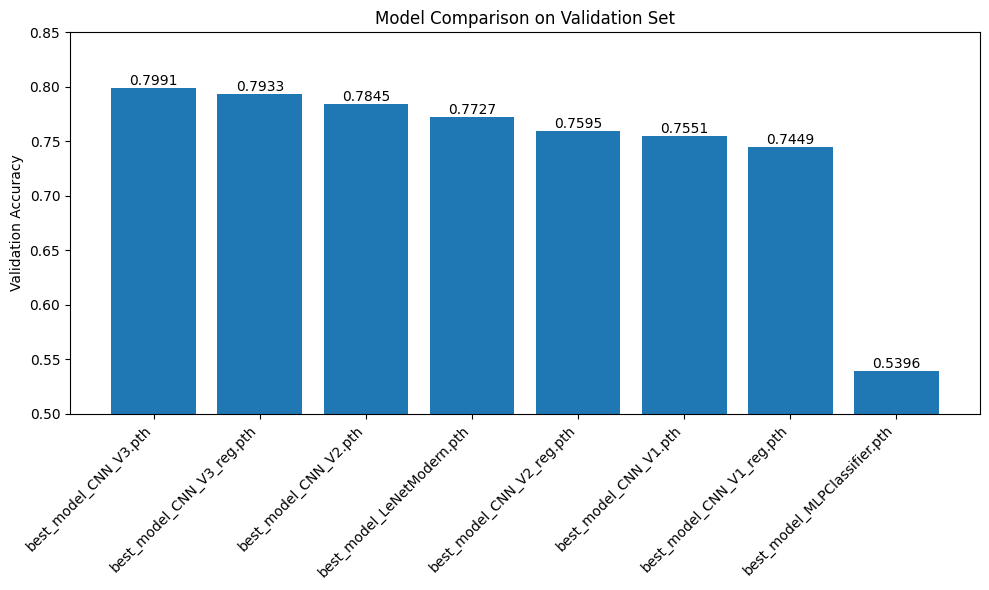

In [11]:
# 🟦 Filter out models containing "improved"
results_df = pd.DataFrame(results)
results_df = results_df[~results_df["model_name"].str.contains("Improved")]  # ⬅️ filter here
results_df = results_df.sort_values(by="accuracy", ascending=False)

# 🟦 Plot results with value labels on bars
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df["model_name"], results_df["accuracy"])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.4f}",
        ha='center',
        va='bottom',
        fontsize=10,
        rotation=0
    )

plt.xticks(rotation=45, ha="right")
plt.ylabel("Validation Accuracy")
plt.ylim([0.5, 0.85])
plt.title("Model Comparison on Validation Set")
plt.tight_layout()
plt.show()
